In [1]:
import pandas as pd

In [16]:
grants_legacy = pd.read_csv('./tiger_grants-14.csv')

grants_legacy.drop(['Unnamed: 11', 'Location Precision'], axis=1, inplace=True)


grants_legacy.columns = grants_legacy.columns.str.strip()

def clean_amount(data, col='Amount'):
    data[col] = data[col].str.strip('$').replace('?', '0')
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].astype('float')
    return data

grants_legacy = clean_amount(grants_legacy)

# TODO convert lat/long to point, obtain shapefile of US entity boundaries, derive state/entity values

grants_legacy.Round.value_counts()

TIGER 2013             52
TIGER 2009             51
TIGER 2012             47
TIGER 2011             46
TIGER 2014             41
TIGER 2010             41
TIGER 2015             39
TIGER 2010 Planning    33
TIGER 2014 Planning    31
Name: Round, dtype: int64

In [21]:
grants_16 = pd.read_csv('tiger_grants_2016.csv')
grants_16 = grants_16.rename(columns={' Amount ': 'Amount',
                                      'Capital vs Planning':'cap_plan',
                                      'Location 1': 'coord'
                                     })
grants_16.drop('Location Precision', axis=1, inplace=True)
grants_16['Round'] = pd.to_datetime(grants_16.Round).dt.year
grants_16

,Modal Administration,Urban/Rural,Project Name,Applicant,Round,cap_plan,Project Type,Project Description,Amount,coord
0,FTA,Urban,Green Fleet Procurement,Regional Transportation Commission of Southern...,2016,Capital,Transit,The project will replace diesel transit buses ...,13324000.0,"(36.1823, -115.1645)"
1,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)"
2,FHWA,Urban,Re-Connecting Cleveland: Pathways to Opportunity,Cleveland Metropolitan Park District,2016,Capital,Road,The project will construct approximately 4 mil...,7950000.0,"(41.4921, -81.6709)"
3,FHWA,Urban,Hollister Avenue Complete Streets Corridor Plan,City of Goleta,2014,Planning,Road,The Hollister Avenue Complete Streets Corridor...,236000.0,"(34.433178, -119.840369)"
4,FHWA,Urban,18th Street Viaduct Planning Project,"City of Sioux City, Iowa",2014,Planning,Road,The 18th Street Viaduct Planning Project will ...,1000000.0,"(42.504993, -96.393464)"
...,...,...,...,...,...,...,...,...,...,...
416,MARAD,Rural,Gordon A. Finch Terminal Improvements,Virgin Islands Port Authority,2016,Capital,Maritime,The project will renovate and reconstruct a ro...,10666878.0,"(17.7331, -64.7681)"
417,FHWA,Urban,North Interstate 25 Phase 1,Colorado Department of Transportation,2016,Capital,Road,The project will improve an approximately 14-m...,15000000.0,"(40.4983, -104.9932)"
418,MARAD,Rural,Port of Newport International Terminal Shippin...,Port of Newport,2015,Capital,Maritime,The Port of Newport International Terminal Shi...,2000000.0,"(44.6762, -124.0146)"
419,FHWA,Rural,BIA Route 7 to US Highway 83 Improvement Project,Rosebud Sioux Tribe,2016,Capital,Road,The project will reconstruct approximately 16 ...,14620000.0,"(43.2548, -100.8743)"


In [20]:
def load_applicants():
    applicants = pd.read_csv('./applicants.csv')
    applicants['Grant'] = applicants.Round
    applicants['Round'] = applicants.Round.str[-4:].astype('int')
    applicants = clean_amount(applicants, col='Funding Request')
    applicants = clean_amount(applicants, col='Project Cost')
applicants

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
0,2009,Alabama Black Belt Infrastructure and Developm...,Alabama Department of Transportation,Alabama,Montgomery,Rail,Rural,65300000.0,79700000.0,State Govt.,TIGER 2009
1,2009,I-20 Widening and Interstate Preservation from...,Alabama Department of Transportation,Alabama,Montgomery,Road,Rural,42744832.0,42744832.0,State Govt.,TIGER 2009
2,2009,LINDEN BYPASS (STATE ROUTE (SR) 13 RELOCATION)...,Alabama Department of Transportation,Alabama,Montgomery,Road,Urban/Rural,33500000.0,33500000.0,State Govt.,TIGER 2009
3,2009,MONTGOMERY OUTER LOOP (STATE ROUTE 108) FROM U...,Alabama Department of Transportation,Alabama,Montgomery,Road,Urban,108000000.0,183000000.0,State Govt.,TIGER 2009
4,2009,U.S. Highway 80 Additional Lanes From US Highw...,Alabama Department of Transportation,Alabama,Montgomery,Road,Rural,25000000.0,25000000.0,State Govt.,TIGER 2009
...,...,...,...,...,...,...,...,...,...,...,...
9759,2020,US 12/18-County AB Interchange Project,Wisconsin Department of Transportation,Wisconsin,Madison,Road,Urban,10000000.0,36890750.0,A: State Government,BUILD 2020
9760,2020,US 53 Pavement Replacement and Safety Improvem...,Wisconsin Department of Transportation,Wisconsin,Madison,Road,Rural,25000000.0,65981000.0,A: State Government,BUILD 2020
9761,2020,"Midwest Avenue Recornstruction Project, Phase III",City of Casper,Wyoming,Casper,Road,Rural,1992000.0,2490000.0,C: City or Township Government,BUILD 2020
9762,2020,Teton Mobility Corridor Improvements Project,Teton County,Wyoming,Jackson,Transit,Rural,21366129.0,28397661.0,B: County Government,BUILD 2020


In [96]:
applicants['State'] = applicants.State.str.strip()

In [99]:
# TODO define share of population / maybe tax revenue for each state entity, add button for those that exceed this number in either apps or grants
applicant_entities = list(applicant.State.unique())

In [102]:
applicants.loc[applicants.State == 'District of Columbia']

,Round,Project Name,Applicant Name,State,City,Project Type,Urban / Rural,Funding Request,Project Cost,Applicant Type,Grant
263,2009,AMTRAK FLEET OVERHAUL PROGRAM,Amtrak,District of Columbia,Washington,Rail,Urban,300000000.0,3.000000e+08,State Govt.,TIGER 2009
264,2009,Amtrak Positive Train Control Program,Amtrak,District of Columbia,Washington,Rail,Urban/Rural,63000000.0,6.300000e+07,Transit Agency,TIGER 2009
265,2009,DULLES CORRIDOR METRORAIL PROJECT/WIEHLE AVENU...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Transit,Urban,90000000.0,2.632487e+09,Port Authority,TIGER 2009
266,2009,DULLES TOLL ROAD ORT CORRIDOR MOBILITY PROJECT,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,44100000.0,5.360000e+07,Port Authority,TIGER 2009
267,2009,I-495 / Dulles Airport Access Highway Intercha...,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,53400000.0,1.034000e+08,Transit agency,TIGER 2009
268,2009,Widening of Virginia State Route 606,Metropolitan Washington Airports Authority,District of Columbia,Washington,Road,Urban,40505000.0,6.250500e+07,Local Government (or political subdivision the...,TIGER 2009
269,2009,"Bus Transit, Bike-Sharing and Intermodal Conne...",Metropolitan Washington Council of Governments,District of Columbia,Washington,Transit,Urban,266718500.0,3.692185e+08,Metropolitan Planning Organization,TIGER 2009
270,2009,WMATA’s Regional Bus Facility Expansion and Mo...,Washington Metropolitan Area Transit Authority...,District of Columbia,Washington,Transit,Urban,98800000.0,2.084000e+08,State Government (or political subdivision the...,TIGER 2009
1675,2010,Anacostia Streetcar Initial Line Phase 2 Exten...,District of Columbia Department of Transportation,District of Columbia,Washington,Transit,Urban,16025000.0,3.205000e+07,State Govt.,TIGER 2010
1676,2010,National Gateway Phases II and III,District of Columbia Department of Transportation,District of Columbia,Washington,Planning,Urban/Rural,3000000.0,3.840000e+08,State Govt.,TIGER 2010


In [98]:
len(applicants[applicants.State == 'District of Columbia']) / len(applicants)

0.0028676771814829987

In [41]:
test_str = grants_16.coord.values[0]
test_str

'(36.1823, -115.1645)'

In [86]:
import re

def to_coords(coord_str):
    try:
        matches = re.search(r'\((\d{2}\.\d+),\s(-*\d+\.\d+)\)', coord_str)
        lat = float(matches.group(1))
        lon = float(matches.group(2))
        return (lat, lon)
    except:
        return 'failed'


grants_16['lat'], grants_16['lon'] = zip(*[to_coords(coord) for coord in list(grants_16.coord)])


grants_16
# to_coords([coord for coord in list(grants_16.coord)][0])

,Modal Administration,Urban/Rural,Project Name,Applicant,Round,cap_plan,Project Type,Project Description,Amount,coord,lat,lon
0,FTA,Urban,Green Fleet Procurement,Regional Transportation Commission of Southern...,2016,Capital,Transit,The project will replace diesel transit buses ...,13324000.0,"(36.1823, -115.1645)",36.182300,-115.164500
1,FHWA,Rural,Downtown Dahlonega Complete Streets Corridor I...,City of Dahlonega,2014,Capital,Road,The project would create Complete Streets to b...,5100000.0,"(34.529753, -83.984814)",34.529753,-83.984814
2,FHWA,Urban,Re-Connecting Cleveland: Pathways to Opportunity,Cleveland Metropolitan Park District,2016,Capital,Road,The project will construct approximately 4 mil...,7950000.0,"(41.4921, -81.6709)",41.492100,-81.670900
3,FHWA,Urban,Hollister Avenue Complete Streets Corridor Plan,City of Goleta,2014,Planning,Road,The Hollister Avenue Complete Streets Corridor...,236000.0,"(34.433178, -119.840369)",34.433178,-119.840369
4,FHWA,Urban,18th Street Viaduct Planning Project,"City of Sioux City, Iowa",2014,Planning,Road,The 18th Street Viaduct Planning Project will ...,1000000.0,"(42.504993, -96.393464)",42.504993,-96.393464
...,...,...,...,...,...,...,...,...,...,...,...,...
416,MARAD,Rural,Gordon A. Finch Terminal Improvements,Virgin Islands Port Authority,2016,Capital,Maritime,The project will renovate and reconstruct a ro...,10666878.0,"(17.7331, -64.7681)",17.733100,-64.768100
417,FHWA,Urban,North Interstate 25 Phase 1,Colorado Department of Transportation,2016,Capital,Road,The project will improve an approximately 14-m...,15000000.0,"(40.4983, -104.9932)",40.498300,-104.993200
418,MARAD,Rural,Port of Newport International Terminal Shippin...,Port of Newport,2015,Capital,Maritime,The Port of Newport International Terminal Shi...,2000000.0,"(44.6762, -124.0146)",44.676200,-124.014600
419,FHWA,Rural,BIA Route 7 to US Highway 83 Improvement Project,Rosebud Sioux Tribe,2016,Capital,Road,The project will reconstruct approximately 16 ...,14620000.0,"(43.2548, -100.8743)",43.254800,-100.874300


In [80]:
grants_16.iloc[375, :]

Modal Administration                                                MARAD
Urban/Rural                                                         Rural
Project Name                                  Rehabilitation of "H" Wharf
Applicant                                          Port Authority of Guam
Round                                                                2016
cap_plan                                                          Capital
Project Type                                                     Maritime
Project Description     The project will reconstruct and expand a whar...
Amount                                                              1e+07
coord                                                 (13.2746, 144.3955)
Name: 375, dtype: object

In [87]:
grants_16.Amount.max()

105000000.0

<AxesSubplot:>

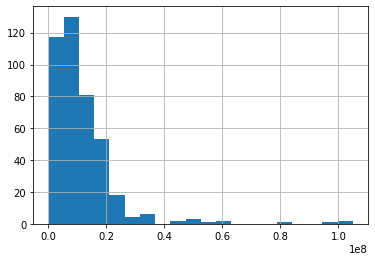

In [93]:
grants_16.Amount.hist(bins=20)

In [92]:
100000000*.2

20000000.0